# CHIPS-CVN Explain

In [1]:
# The configuration yaml file must be specified
config_file = "./config/tsne.yml"

In [2]:
# Import all the required modules and call the gpu_setup utility
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import tf_explain

import chipscvn.utils as utils
import chipscvn.config as config
utils.gpu_setup()  # Setup the GPU's

/mnt/storage/jtingey/chips-cvn/env/miniconda/envs/chips-cvn/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Welcome to JupyROOT 6.18/04
---  4 Physical GPUs, 4 Logical GPUs ---


In [3]:
# Load the trained models from the configuration and run the evaluator
conf = config.get(config_file)
evaluator = utils.get_evaluator(conf)
evaluator.run()

--- Running Evaluation ---

--- running inference...

--- parsing outputs...

--- calculating weights...

Total-> Nuel: 14984, Numu: 14991, Cosmic: 2025

Weights-> Nuel:0.0053, Numu:0.2274, Cosmic:597.8754

--- calculating cuts...

--- Done (took 100.72362637519836 seconds) ---



2020-03-18 13:58:19.242414: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-03-18 13:58:19.539761: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


## Explain Cosmic Network

First we explain how the cosmic network works...

In [4]:
N = 2000
cosmic_data = []
cosmic_data.append(evaluator.events[evaluator.events.true_cosmic == True][:N])
cosmic_data.append(evaluator.events[evaluator.events.true_cosmic == False][:N])
cosmic_data = pd.concat(cosmic_data)
cosmic_data = cosmic_data[['true_category', 'true_cat_combined', 'true_cosmic', 'cosmic_dense']]
cosmic_data = cosmic_data.sample(frac=1).reset_index(drop=True)

# Remove dense output mean and scale to unit variance
cosmic_scaler = StandardScaler()  
cosmic_dense = np.stack(cosmic_data['cosmic_dense'])
cosmic_dense = cosmic_scaler.fit_transform(cosmic_dense)  

In [5]:
cosmic_pca = PCA(n_components=3)
cosmic_pca_result = cosmic_pca.fit_transform(cosmic_dense)
cosmic_pca_df = pd.DataFrame(cosmic_pca_result)
cosmic_data['cosmic-pca-0'] = cosmic_pca_df[0]
cosmic_data['cosmic-pca-1'] = cosmic_pca_df[1]
cosmic_data['cosmic-pca-2'] = cosmic_pca_df[2]

Explained variation per principal component: [0.62534416 0.18568622 0.041239  ]


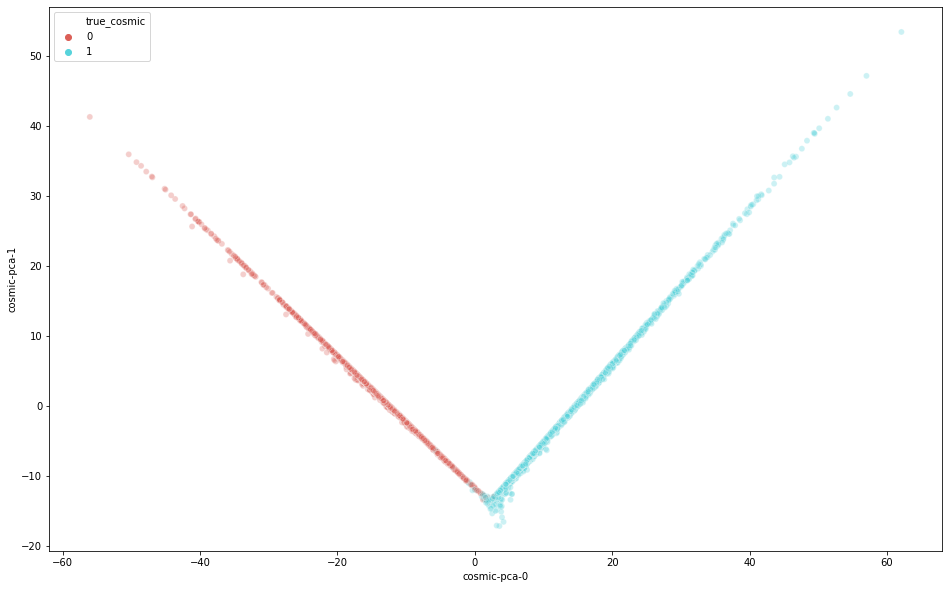

In [6]:
print('Explained variation per principal component: {}'.format(cosmic_pca.explained_variance_ratio_))
plt.figure(figsize=(16,10))
sns.scatterplot(x="cosmic-pca-0", y="cosmic-pca-1", hue="true_cosmic", palette=sns.color_palette("hls", 2),
    data=cosmic_data, legend="full", alpha=0.3)
plt.show()

In [7]:
cosmic_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
cosmic_tsne_results = cosmic_tsne.fit_transform(cosmic_dense)
cosmic_tsne_df = pd.DataFrame(cosmic_tsne_results)
cosmic_data['cosmic-tsne-0'] = cosmic_tsne_df[0]
cosmic_data['cosmic-tsne-1'] = cosmic_tsne_df[1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.258s...
[t-SNE] Computed neighbors for 4000 samples in 21.284s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 1.230706
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.215675
[t-SNE] KL divergence after 300 iterations: 1.375148


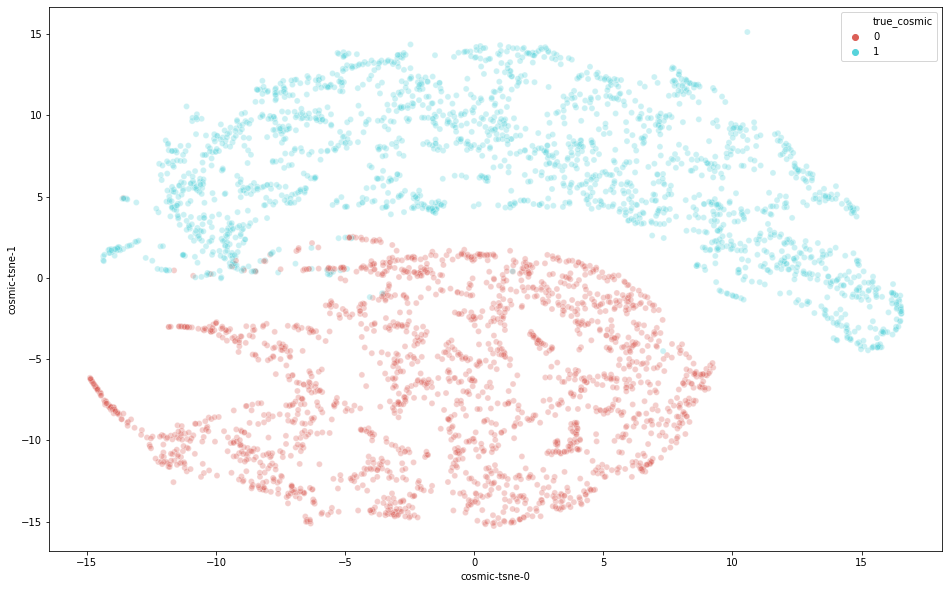

In [8]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="cosmic-tsne-0", y="cosmic-tsne-1", hue="true_cosmic", palette=sns.color_palette("hls", 2),
    data=cosmic_data, legend="full", alpha=0.3)
plt.show()

## Explain Beam Network

Now we explain how the beam network works...

In [9]:
N = 1000
beam_data = []
for i in range(9):
    beam_data.append(evaluator.events[evaluator.events.true_category == i][:N])
beam_data = pd.concat(beam_data)
beam_data = beam_data[['true_category', 'true_cat_combined', 'true_cosmic', 'beam_dense']]
beam_data = beam_data.sample(frac=1).reset_index(drop=True)

# Remove dense output mean and scale to unit variance
beam_scaler = StandardScaler()  
beam_dense = np.stack(beam_data['beam_dense'])
beam_dense = beam_scaler.fit_transform(beam_dense)  

In [10]:
beam_pca = PCA(n_components=3)
beam_pca_result = beam_pca.fit_transform(beam_dense)
beam_pca_df = pd.DataFrame(beam_pca_result)
beam_data['beam-pca-0'] = beam_pca_df[0]
beam_data['beam-pca-1'] = beam_pca_df[1]
beam_data['beam-pca-2'] = beam_pca_df[2]

Explained variation per principal component: [0.27147815 0.15736341 0.13328214]


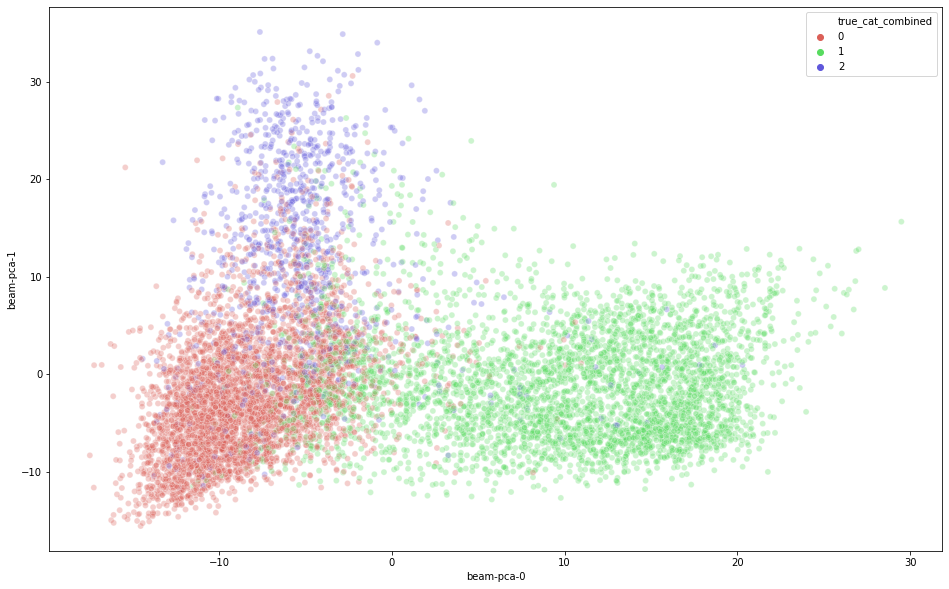

In [11]:
print('Explained variation per principal component: {}'.format(beam_pca.explained_variance_ratio_))
plt.figure(figsize=(16,10))
sns.scatterplot(x="beam-pca-0", y="beam-pca-1", hue="true_cat_combined", palette=sns.color_palette("hls", 3),
    data=beam_data, legend="full", alpha=0.3)
plt.show()

In [12]:
beam_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
beam_tsne_results = beam_tsne.fit_transform(beam_dense)
beam_tsne_df = pd.DataFrame(beam_tsne_results)
beam_data['beam-tsne-0'] = beam_tsne_df[0]
beam_data['beam-tsne-1'] = beam_tsne_df[1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9000 samples in 0.933s...
[t-SNE] Computed neighbors for 9000 samples in 109.787s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9000
[t-SNE] Computed conditional probabilities for sample 2000 / 9000
[t-SNE] Computed conditional probabilities for sample 3000 / 9000
[t-SNE] Computed conditional probabilities for sample 4000 / 9000
[t-SNE] Computed conditional probabilities for sample 5000 / 9000
[t-SNE] Computed conditional probabilities for sample 6000 / 9000
[t-SNE] Computed conditional probabilities for sample 7000 / 9000
[t-SNE] Computed conditional probabilities for sample 8000 / 9000
[t-SNE] Computed conditional probabilities for sample 9000 / 9000
[t-SNE] Mean sigma: 3.362002
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.195610
[t-SNE] KL divergence after 300 iterations: 2.504911


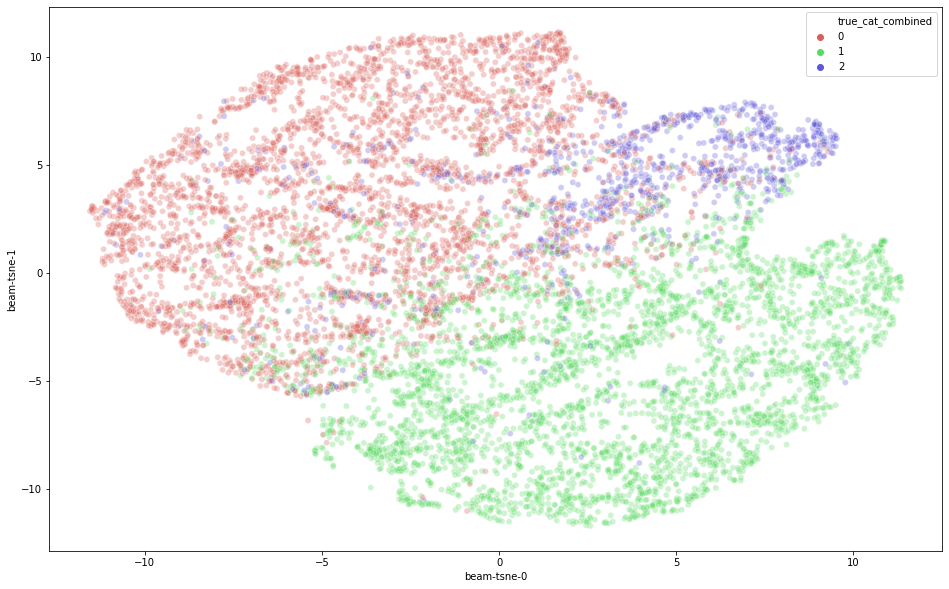

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="beam-tsne-0", y="beam-tsne-1", hue="true_cat_combined", palette=sns.color_palette("hls", 3),
    data=beam_data, legend="full", alpha=0.3)
plt.show()